# 🚕 Taxi Tip Comparison
**Author:** Logan Kaliba  
**Date:** February 13, 2025  

**Context:** I'll be looking customer tips from a taxi company. The goal of this project is to determine whether there's a significant difference in average tip amount between yellow and green taxis in NYC.

This analysis uses a 2-sample t-test in Python with SciPy.

# === 1. Import Libraries ===

In [ ]:
import pandas as pd
import seaborn as sns
from scipy import stats

# === 2. Load and Explore the Dataset ===

In [ ]:
# Load the CSV file into a dataframe.
taxi_samples = pd.read_csv('https://bit.ly/taxi-samples')

In [ ]:
# Calculate the dimensions of the dataset.
# 584 records, 8 columns
taxi_samples.shape

(584, 8)

In [ ]:
# List the columns in the dataset along with their data types.
# The data found in the "tip" column are float types
taxi_samples.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          584 non-null    int64  
 1   passengers  584 non-null    int64  
 2   color       584 non-null    object 
 3   distance    584 non-null    float64
 4   fare        584 non-null    float64
 5   tip         584 non-null    float64
 6   tolls       584 non-null    float64
 7   total       584 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 36.6+ KB


In [ ]:
# Preview the first 5 records in the dataset.
taxi_samples.head()

id  passengers   color  distance  fare   tip  tolls  total
0   1           1   green      0.72   5.5  1.11    0.0   7.56
1   2           3  yellow      2.16  10.0  2.88    0.0  15.80
2   3           1   green      0.15   7.0  2.19    0.0   8.40
3   4           3  yellow      7.35  22.5  5.38    0.0  27.30
4   5           1   green      3.44  12.5  3.35    0.0  15.96

In [ ]:
# Generating descriptive stats for the numeric columns in the dataset.
# The average tip across the dataset is $2.65
taxi_samples.describe()

id  passengers    distance        fare         tip       tolls  \
count  584.000000  584.000000  584.000000  584.000000  584.000000  584.000000   
mean   292.500000    1.446918    2.333699   10.687500    2.651558    0.053836   
std    168.730554    1.126900    2.038913    6.368975    1.364825    0.541843   
min      1.000000    0.000000    0.000000    3.000000    0.060000    0.000000   
25%    146.750000    1.000000    1.000000    6.500000    1.697500    0.000000   
50%    292.500000    1.000000    1.595000    8.500000    2.580000    0.000000   
75%    438.250000    1.000000    3.012500   13.125000    3.530000    0.000000   
max    584.000000    6.000000   13.900000   50.000000    7.730000    5.760000   

            total  
count  584.000000  
mean    15.912483  
std      7.891350  
min      4.810000  
25%     10.380000  
50%     13.555000  
75%     19.560000  
max     57.800000

# === 3. Segment Data by Cab Color and Visualize ===

In [ ]:
# Here I segmented the data, so that I can have two additional dataframes -- one with yellow cab data and another with green cab data.
# I called them "df_taxi_yellow" and "df_taxi_green".
df_taxi_yellow = taxi_samples[taxi_samples['color'] == 'green']
df_taxi_green = taxi_samples[taxi_samples['color'] == 'yellow']

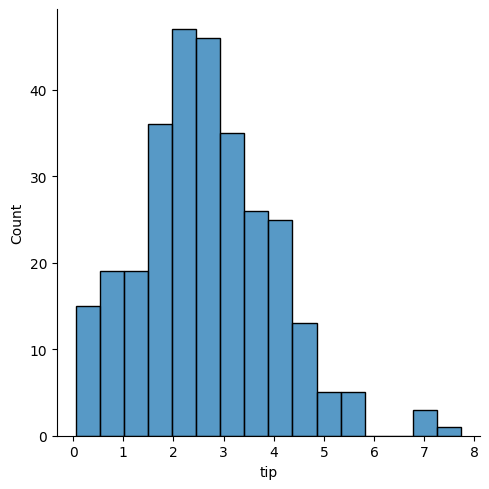

In [ ]:
# I generated a histogram to visualize the distribution of tips within the yellow cab data.
sns.displot(df_taxi_yellow['tip']);

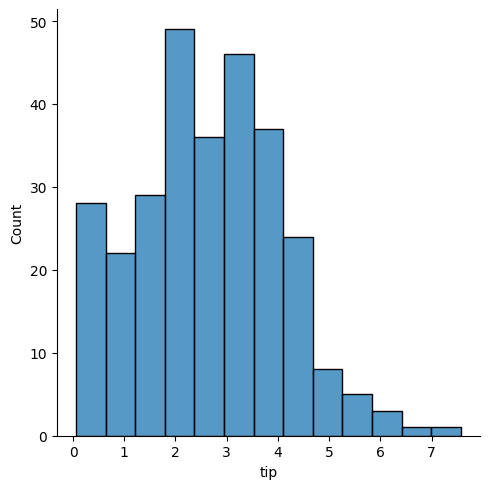

In [ ]:
# I generated a histogram to visualize the distribution of tips within the green cab data.
sns.displot(df_taxi_green['tip'])

# === 4. Test for Normality ===

In [ ]:
from os import stat
# Next, I will perform a normality test to see if the data within the "tip" columns for yellow and green taxis are normally distributed.
# If the p-values are > 0.05, that means that each dataset is normal
x = df_taxi_yellow['tip']
y = df_taxi_green['tip']

In [ ]:
# Perform normaility test
# Based on results from the normality tests (p-values), both of the datasets is "normal enough" for our purposes.
print(stats.normaltest(x))
print(stats.normaltest(y))

NormaltestResult(statistic=18.463276952811235, pvalue=9.789270985641703e-05)
NormaltestResult(statistic=3.64258187700985, pvalue=0.16181672060489052)


# === 5. Test for Equal Variance (Bartlett’s Test) ===

In [ ]:
# Prior to conducting the 2-sample t-test, I performed a Bartlett's test to evaluate the equal variance of the two datasets.
# We can assume NO differences in variance as the p-value (0.379) > 0.05.
stats.bartlett(x, y)

BartlettResult(statistic=0.7714482981698573, pvalue=0.37976938229166823)

# === 6. Conduct 2-Sample T-Test ===

In [ ]:
# I then conducted a 2-sample t-test to determine if there is a statistically significant difference in tips between yellow and green taxi cab.
stats.ttest_ind(x, y)

TtestResult(statistic=-0.04542243544132782, pvalue=0.9637861790300399, df=582.0)

In [ ]:
# Based on the results from the t-test, we cannot state there is a difference in average tip between yellow and green taxi cabs.
# Since the p-value 0.963 > 0.05, we fail to reject the null hypothesis and assume no differences between the two samples.